In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("../dataset/WorldCupShootouts.csv")
df

,Zone,Foot,Keeper,Goal
0,7,R,R,1
1,9,R,C,1
2,6,R,L,1
3,2,R,C,1
4,9,R,L,1
...,...,...,...,...
274,7,R,L,1
275,7,R,R,1
276,4,R,R,1
277,7,R,R,1


In [20]:
from sklearn.preprocessing import LabelEncoder

label_encoder_foot = LabelEncoder()
label_encoder_keeper = LabelEncoder()

df['Foot'] = label_encoder_foot.fit_transform(df['Foot'])
df['Keeper'] = label_encoder_keeper.fit_transform(df['Keeper'])

# input and output / loaded from csv file.
features = df[['Zone', 'Foot', 'Keeper']].values 
label = df['Goal'].values


In [21]:
from sklearn.model_selection import train_test_split

# Split into training and test set
train_x, test_x, train_y, test_y = train_test_split(features, label, test_size=0.4, random_state=42)

In [22]:
print(train_x.shape)
print(train_y.shape)

print(train_x.dtype)
print(train_y.dtype)

(167, 3)
(167,)
int64
int64


In [64]:
print(test_x)
print(test_y)

[[9 1 1]
 [2 1 2]
 [8 1 0]
 [3 1 0]
 [8 1 2]
 [7 1 1]
 [2 1 2]
 [7 1 0]
 [7 1 0]
 [9 1 2]
 [9 1 2]
 [3 1 0]
 [9 1 2]
 [5 0 1]
 [6 1 1]
 [9 1 0]
 [7 0 2]
 [5 1 1]
 [5 0 1]
 [7 1 2]
 [1 1 1]
 [6 1 2]
 [7 0 2]
 [5 1 1]
 [4 1 2]
 [6 1 2]
 [3 1 2]
 [9 1 1]
 [9 1 0]
 [7 0 1]
 [1 0 2]
 [5 1 1]
 [8 0 1]
 [7 1 1]
 [1 0 2]
 [6 1 2]
 [9 0 1]
 [4 1 1]
 [8 0 1]
 [7 1 2]
 [8 0 1]
 [2 1 1]
 [7 0 2]
 [8 1 1]
 [2 1 2]
 [9 0 1]
 [1 1 2]
 [1 1 1]
 [7 1 1]
 [9 1 0]
 [4 1 2]
 [3 1 1]
 [7 1 1]
 [6 1 2]
 [7 1 2]
 [7 1 1]
 [1 1 1]
 [5 1 2]
 [1 1 1]
 [9 1 2]
 [3 1 2]
 [4 1 1]
 [1 1 2]
 [6 0 2]
 [8 1 1]
 [8 0 2]
 [7 1 1]
 [9 0 2]
 [1 1 1]
 [7 0 1]
 [5 1 1]
 [6 1 0]
 [9 1 1]
 [2 0 2]
 [4 0 2]
 [2 1 1]
 [3 0 1]
 [2 1 1]
 [7 1 1]
 [5 1 2]
 [5 1 2]
 [3 1 1]
 [7 1 1]
 [8 0 2]
 [5 1 1]
 [4 0 2]
 [8 1 1]
 [7 1 0]
 [7 1 1]
 [5 1 1]
 [9 1 1]
 [7 1 1]
 [9 1 2]
 [4 0 3]
 [4 1 2]
 [7 1 2]
 [4 1 1]
 [1 1 1]
 [3 0 1]
 [6 1 2]
 [9 0 2]
 [6 1 2]
 [7 1 2]
 [7 1 1]
 [1 1 2]
 [6 1 1]
 [6 1 1]
 [1 0 1]
 [7 1 1]
 [6 1 0]
 [2 1 2]
 

In [101]:
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3, 10)

        self.fc5 = nn.Linear(10, 1)

    def forward(self, x):
        x = F.sigmoid(self.fc1(x))


        x = F.sigmoid(self.fc5(x))
        
        return x

model = Model()
model

Model(
  (fc1): Linear(in_features=3, out_features=10, bias=True)
  (fc5): Linear(in_features=10, out_features=1, bias=True)
)

In [102]:
from torch.utils.data import DataLoader, Dataset

tr_x = torch.FloatTensor(train_x).view(-1, 3)
tr_y = torch.FloatTensor(train_y).view(-1, 1)

te_x = torch.FloatTensor(test_x).view(-1, 3)
te_y = torch.FloatTensor(test_y).view(-1, 1)

train = torch.utils.data.TensorDataset(tr_x, tr_y)
test = torch.utils.data.TensorDataset(te_x, te_y)

batch = 1
trainloader = DataLoader(train, batch_size = batch, shuffle = True)
testloader = DataLoader(test, batch_size = batch, shuffle = True)

In [103]:
epochs = 1000
lr = 0.01
train_loss, test_loss = [], []
steps = 200

criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=lr)

In [104]:
from tqdm import tqdm

for epoch in range(epochs+1):
    total_loss = 0
    for i, (kick, results) in enumerate((trainloader)):
        predict = model(kick)
        loss = criterion(predict, results)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()

    if (epoch) % steps == 0:
        te_loss = 0
        accuracy = 0
        with torch.no_grad():
            model.eval()
            for j, (kick, results) in enumerate(testloader):
                predict = model(kick)
                te_loss += criterion(predict, results)
        
        train_loss.append(total_loss/len(trainloader))
        test_loss.append(te_loss/len(testloader))

        model.train()

        print("Epoch: {}/{}.. ".format(epoch, epochs),
                "Training Loss: {:.3f}.. ".format(train_loss[-1]),
                "Test Loss: {:.3f}.. ".format(test_loss[-1])
                ,predict)

Epoch: 0/1000..  Training Loss: 0.637..  Test Loss: 0.619..  tensor([[0.6436]])
Epoch: 200/1000..  Training Loss: 0.601..  Test Loss: 0.651..  tensor([[0.6697]])
Epoch: 400/1000..  Training Loss: 0.595..  Test Loss: 0.666..  tensor([[0.7094]])
Epoch: 600/1000..  Training Loss: 0.586..  Test Loss: 0.683..  tensor([[0.7711]])
Epoch: 800/1000..  Training Loss: 0.577..  Test Loss: 0.693..  tensor([[0.9137]])
Epoch: 1000/1000..  Training Loss: 0.570..  Test Loss: 0.704..  tensor([[0.5976]])


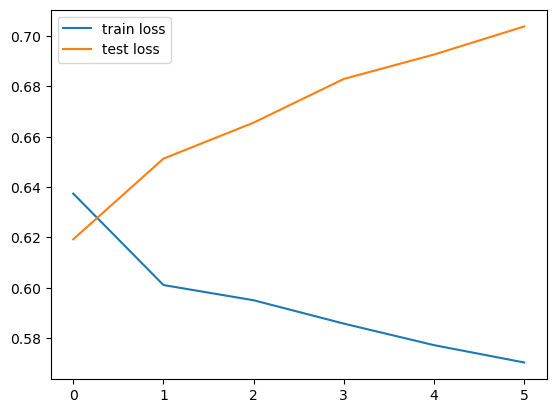

In [105]:
plt.plot(train_loss, label='train loss')
plt.plot(test_loss, label='test loss')
plt.legend()
plt.show()

In [106]:
from sklearn.metrics import accuracy_score

model.eval()

acc = 0
for j, (kick, results) in enumerate(testloader):
    predict = model(kick)
    acc += accuracy_score(results, torch.argmax(predict, axis=1))

acc = acc / (j+1)
print("%.2f" % (acc * 100), '%')
print(kick, results, predict)

31.25 %
tensor([[5., 0., 1.]]) tensor([[1.]]) tensor([[0.7200]], grad_fn=<SigmoidBackward0>)


In [108]:
model.eval()

with torch.no_grad():
    predicted = model(tr_x)
    accuracy = (predicted.eq(tr_y).sum() / tr_y.shape[0]).item()
    print(f'Accuracy: {accuracy:.4f}')

# 예측 결과 출력
print("Predicted:", predicted.numpy())
print("Actual:", tr_y.view(-1).numpy())

Accuracy: 0.0000
Predicted: [[0.6239844 ]
 [0.6559619 ]
 [0.6642002 ]
 [0.62524384]
 [0.6268479 ]
 [0.81581324]
 [0.6559619 ]
 [0.62524384]
 [0.61471903]
 [0.5976165 ]
 [0.59615654]
 [0.6641157 ]
 [0.6641157 ]
 [0.6559619 ]
 [0.5976165 ]
 [0.59615654]
 [0.90818185]
 [0.7252691 ]
 [0.5976165 ]
 [0.69193095]
 [0.46654356]
 [0.6641157 ]
 [0.6642002 ]
 [0.6641157 ]
 [0.6248857 ]
 [0.6378468 ]
 [0.46654356]
 [0.61302704]
 [0.5976165 ]
 [0.5976165 ]
 [0.61471903]
 [0.5947505 ]
 [0.75634277]
 [0.69193095]
 [0.5976165 ]
 [0.61471903]
 [0.6559619 ]
 [0.62524384]
 [0.6559619 ]
 [0.6641157 ]
 [0.5790105 ]
 [0.61302704]
 [0.6061704 ]
 [0.6641157 ]
 [0.9150914 ]
 [0.6641157 ]
 [0.605     ]
 [0.6642002 ]
 [0.6386123 ]
 [0.7888197 ]
 [0.6239844 ]
 [0.6559619 ]
 [0.61302704]
 [0.5976165 ]
 [0.5976165 ]
 [0.61302704]
 [0.61471903]
 [0.90818185]
 [0.65310967]
 [0.5790105 ]
 [0.59615654]
 [0.73295516]
 [0.584171  ]
 [0.6248857 ]
 [0.90818185]
 [0.6652777 ]
 [0.584171  ]
 [0.6642002 ]
 [0.7252691 ]
 [0.61